* Curve fitting using Least squares
    * For the 2D points, find the 2nd-order curve using least squares
    * y = ax^2 + bx + c
* Sampling 6 2D points out of total 8 points
    * Randomly select 6 point
    * Twice curve fitting
    * Compare two curves

In [2]:
points = [(-2.9, 35.4), (-2.1, 19.7), (-0.9, 5.7), (1.1, 2.1), (0.1, 1.2), (1.9, 8.7), (3.1, 25.7), (4.0, 41.5)]

In [3]:
import numpy as np
from matplotlib import pyplot

In [4]:
points[0][1]

35.4

In [5]:
rand = np.random.choice(range(8), 6, replace=False, p=None)

In [6]:
A = np.zeros(shape=(6,3))
x = np.zeros(shape=(6,1))
y = np.zeros(shape=(6,1))

for i in range(len(rand)) :
    x[i] = points[rand[i]][0]
    A[i] = [x[i]**2, x[i], 1]
    y[i] = points[rand[i]][1]

print(A)
print(y)

[[ 9.61e+00  3.10e+00  1.00e+00]
 [ 3.61e+00  1.90e+00  1.00e+00]
 [ 1.60e+01  4.00e+00  1.00e+00]
 [ 8.41e+00 -2.90e+00  1.00e+00]
 [ 8.10e-01 -9.00e-01  1.00e+00]
 [ 1.00e-02  1.00e-01  1.00e+00]]
[[25.7]
 [ 8.7]
 [41.5]
 [35.4]
 [ 5.7]
 [ 1.2]]


In [7]:
def  Least_Squares(matrix_X, matrix_y) :
    return np.dot(np.dot(np.linalg.inv(np.dot(matrix_X.T, matrix_X)), matrix_X.T),matrix_y)

In [8]:
b = Least_Squares(A, y)
b

array([[ 3.14773841],
       [-2.39063659],
       [ 1.63997202]])

In [9]:
def func(a, b, c, x) :
    return a*(x**2) + b*x + c

In [10]:
x

array([[ 3.1],
       [ 1.9],
       [ 4. ],
       [-2.9],
       [-0.9],
       [ 0.1]])

In [11]:
x.sort()

In [15]:
x

[-2.9, -2.1, -0.9, 1.1, 0.1, 1.9, 3.1, 4.0]

In [12]:
func(b[0], b[1], b[2], x)

array([[24.47876469],
       [ 8.46109815],
       [42.44124019],
       [35.04529815],
       [ 6.34121306],
       [ 1.43238575]])

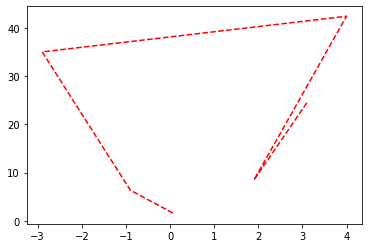

In [13]:
pyplot.plot(x, func(b[0],b[1],b[2], x), '--', color='red')
pyplot.show()

In [14]:
 
# define the true objective function
def objective(x, a, b, c):
	return a * x + (b * (x**2)) + c

# choose the input and output variables
x = []
y = []

for i, j in points :
    x.append(i)
    y.append(j)

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

NameError: name 'curve_fit' is not defined